# Neural Network Model

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import mediapipe as mp
import matplotlib.pyplot as plt
import seaborn as sns

2024-11-18 14:19:54.678017: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading Data

In [2]:
train = pd.read_csv('../data/train.csv')

In [4]:
X = train.drop(columns=['class'])
X

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_z,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis
0,0.496112,0.074267,-0.250955,0.999003,0.528190,0.059394,-0.146007,0.997941,0.550696,0.060177,...,0.583128,0.326710,0.678813,0.983212,0.119562,0.632338,0.294864,0.968790,-0.093413,0.614772
1,0.562682,0.276660,-0.198480,0.993795,0.536773,0.270362,-0.174587,0.988927,0.534374,0.271651,...,0.035673,0.428453,0.604428,0.948188,0.341276,0.117294,0.603007,0.955990,-0.174406,0.335239
2,0.574148,0.487764,-0.557857,0.990614,0.583043,0.462585,-0.491770,0.984532,0.593059,0.461599,...,-0.663413,0.020145,0.539870,0.980021,-0.074462,0.011276,0.542893,0.920744,-0.875640,0.009579
3,0.529831,0.302906,-0.203826,0.982334,0.516948,0.311757,-0.229820,0.984826,0.515518,0.311879,...,0.286762,0.101021,0.705342,0.155320,0.327046,0.111655,0.634855,0.151662,0.270079,0.085881
4,0.527149,0.262190,0.007185,0.997610,0.514947,0.269760,0.031363,0.996554,0.515483,0.271882,...,-0.133639,0.631415,0.646852,0.836624,0.284874,0.074641,0.661294,0.846730,-0.304578,0.688178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.615359,0.286016,-0.523372,0.996935,0.618082,0.264836,-0.465179,0.995749,0.623508,0.263578,...,0.479627,0.076410,0.625430,1.019641,0.489708,0.113991,0.509327,1.002092,0.214984,0.080464
2556,0.580398,0.087267,-0.551150,0.999854,0.592130,0.071070,-0.496824,0.999768,0.601941,0.071943,...,0.184908,0.974320,0.615270,0.647368,0.460427,0.893272,0.619079,0.948757,-0.106826,0.994693
2557,0.396434,0.236478,-0.455173,0.999565,0.382668,0.221605,-0.403320,0.999406,0.380231,0.221041,...,-0.293523,0.843554,0.443175,0.947789,0.827978,0.685590,0.417621,0.960251,-0.604005,0.936873
2558,0.423315,0.539645,-0.223277,0.992970,0.429766,0.531515,-0.202113,0.992343,0.430334,0.526262,...,-0.430929,0.742113,0.435206,0.806576,-0.472791,0.907553,0.391049,0.745000,-0.569488,0.904462


In [5]:
print(X.shape)
33*4

(2560, 132)


132

In [6]:
y = train.loc[:, 'class']
y

0       HastaUttanasana
1       HastaUttanasana
2       HastaUttanasana
3       HastaUttanasana
4       HastaUttanasana
             ...       
2555        Pranamasana
2556        Pranamasana
2557        Pranamasana
2558        Pranamasana
2559        Pranamasana
Name: class, Length: 2560, dtype: object

In [ ]:
classes = train.loc[:, 'class'].unique()
classes

array(['HastaUttanasana', 'Uttanasana', 'Parvatasana',
       'AshwaSanchalanasana', 'Bhujangasana', 'AshtangaNamaskara',
       'Pranamasana'], dtype=object)

In [7]:
y = pd.get_dummies(train.loc[:, 'class'])

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
test = pd.read_csv('../data/test.csv')
X_test = test.drop(columns=['class'])
y_test = pd.get_dummies(test.loc[:, 'class'])

## Defining Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

In [32]:
model = Sequential([
    Input((X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,735 (100.53 KB)

 Trainable params: 25,735 (100.53 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
checkpoint_path = '../models/Keypoints_NN_model.keras'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    restore_best_weights=True
)

csv_logger = CSVLogger('../logs/keypoint_nn_classifier.log')

callbacks = [checkpoint, earlystop, csv_logger]

## Model Training

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/50
 92/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2901 - loss: 1.7561
Epoch 1: val_loss improved from inf to 0.91222, saving model to m1.keras
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3305 - loss: 1.6766 - val_accuracy: 0.7031 - val_loss: 0.9122
Epoch 2/50
107/128 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.6753 - loss: 0.9217
Epoch 2: val_loss improved from 0.91222 to 0.54447, saving model to m1.keras
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6827 - loss: 0.9033 - val_accuracy: 0.8672 - val_loss: 0.5445
Epoch 3/50
103/128 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.8045 - loss: 0.5928
Epoch 3: val_loss improved from 0.54447 to 0.41122, saving model to m1.keras
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8072 - loss: 0.5870 - val_accuracy: 0.8809 - val_loss: 0.4112
Epoch 4/50
126/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8690 - loss: 0.4489
Epoch 4: val_loss improved from 0.41122 to 0.36717, saving model to m1.ker

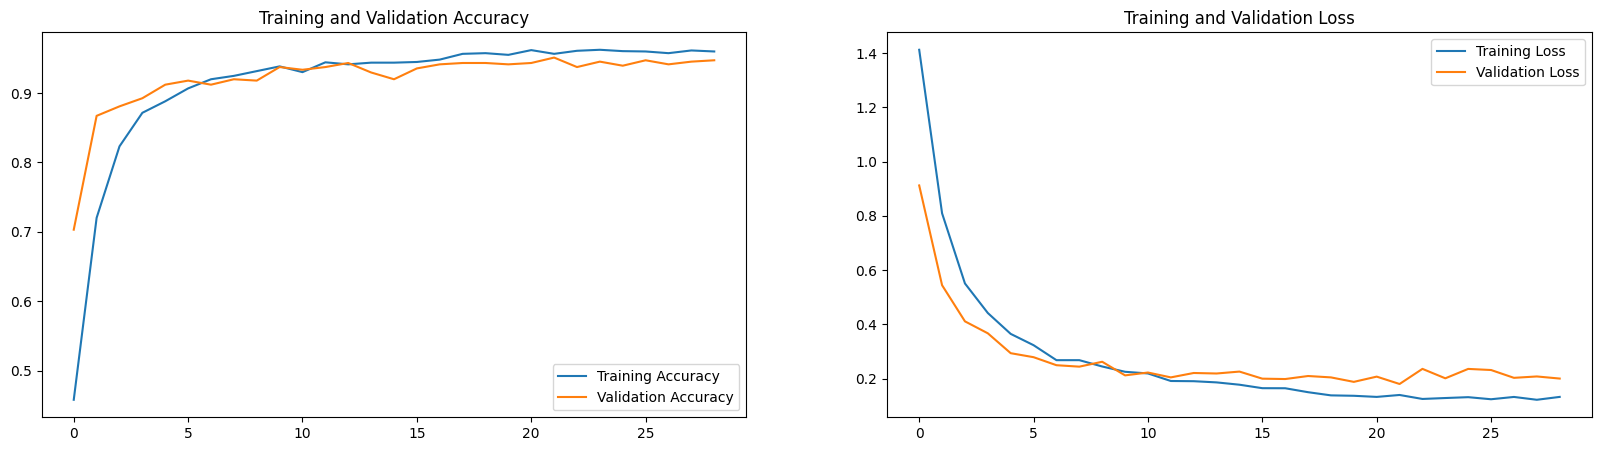

In [17]:
def plot_training_history(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(len(train_acc))

    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)

## Model Evaluation

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss, test_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - accuracy: 0.9361 - loss: 0.3180
0.30038484930992126 0.9477020502090454


In [22]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  
y_true = np.argmax(y_test, axis=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step


In [23]:
y_test.columns

Index(['AshtangaNamaskara', 'AshwaSanchalanasana', 'Bhujangasana',
       'HastaUttanasana', 'Parvatasana', 'Pranamasana', 'Uttanasana'],
      dtype='object')

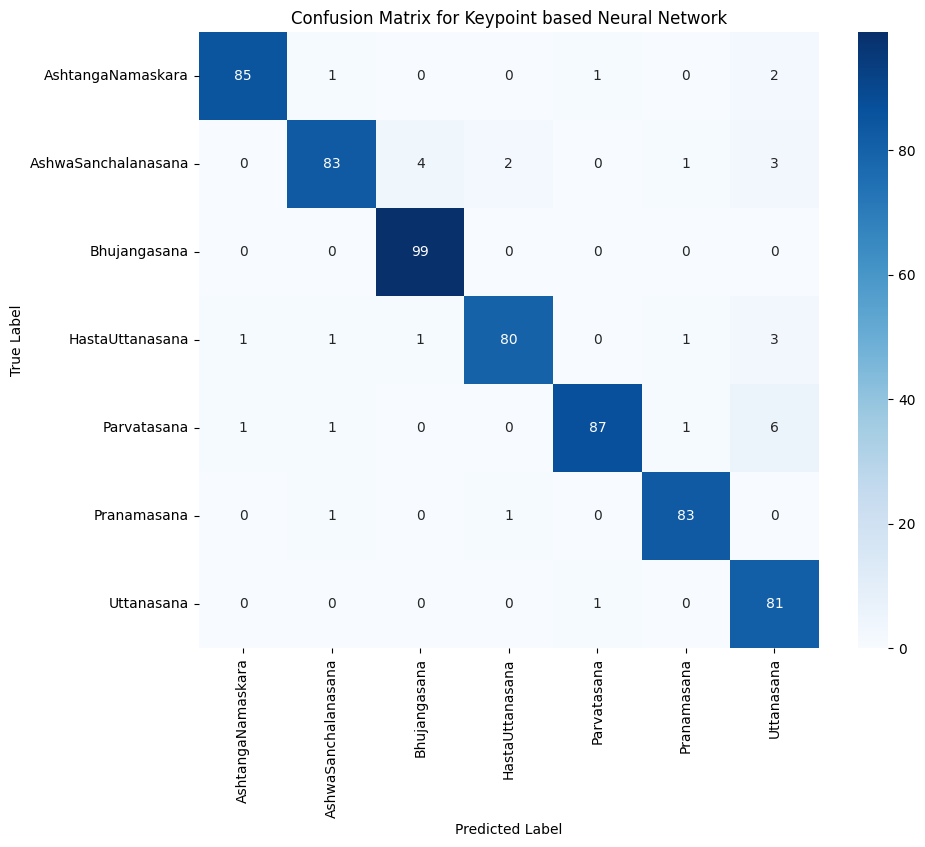

In [24]:
conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.columns, yticklabels=y_test.columns)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Keypoint based Neural Network')
plt.show()

In [26]:
cr = classification_report(y_true, y_pred)
print('Classification report for keypoints based neural network:\n', cr)

Classification report for keypoints based neural network:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        89
           1       0.95      0.89      0.92        93
           2       0.95      1.00      0.98        99
           3       0.96      0.92      0.94        87
           4       0.98      0.91      0.94        96
           5       0.97      0.98      0.97        85
           6       0.85      0.99      0.92        82

    accuracy                           0.95       631
   macro avg       0.95      0.95      0.95       631
weighted avg       0.95      0.95      0.95       631



# KNN Model

## Importing required libraries

In [26]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Loading Data

In [22]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [23]:
train.iloc[:, :-1]

,NOSE_x,NOSE_y,NOSE_z,NOSE_vis,LEFT_EYE_INNER_x,LEFT_EYE_INNER_y,LEFT_EYE_INNER_z,LEFT_EYE_INNER_vis,LEFT_EYE_x,LEFT_EYE_y,...,RIGHT_HEEL_z,RIGHT_HEEL_vis,LEFT_FOOT_INDEX_x,LEFT_FOOT_INDEX_y,LEFT_FOOT_INDEX_z,LEFT_FOOT_INDEX_vis,RIGHT_FOOT_INDEX_x,RIGHT_FOOT_INDEX_y,RIGHT_FOOT_INDEX_z,RIGHT_FOOT_INDEX_vis
0,0.496112,0.074267,-0.250955,0.999003,0.528190,0.059394,-0.146007,0.997941,0.550696,0.060177,...,0.583128,0.326710,0.678813,0.983212,0.119562,0.632338,0.294864,0.968790,-0.093413,0.614772
1,0.562682,0.276660,-0.198480,0.993795,0.536773,0.270362,-0.174587,0.988927,0.534374,0.271651,...,0.035673,0.428453,0.604428,0.948188,0.341276,0.117294,0.603007,0.955990,-0.174406,0.335239
2,0.574148,0.487764,-0.557857,0.990614,0.583043,0.462585,-0.491770,0.984532,0.593059,0.461599,...,-0.663413,0.020145,0.539870,0.980021,-0.074462,0.011276,0.542893,0.920744,-0.875640,0.009579
3,0.529831,0.302906,-0.203826,0.982334,0.516948,0.311757,-0.229820,0.984826,0.515518,0.311879,...,0.286762,0.101021,0.705342,0.155320,0.327046,0.111655,0.634855,0.151662,0.270079,0.085881
4,0.527149,0.262190,0.007185,0.997610,0.514947,0.269760,0.031363,0.996554,0.515483,0.271882,...,-0.133639,0.631415,0.646852,0.836624,0.284874,0.074641,0.661294,0.846730,-0.304578,0.688178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2555,0.615359,0.286016,-0.523372,0.996935,0.618082,0.264836,-0.465179,0.995749,0.623508,0.263578,...,0.479627,0.076410,0.625430,1.019641,0.489708,0.113991,0.509327,1.002092,0.214984,0.080464
2556,0.580398,0.087267,-0.551150,0.999854,0.592130,0.071070,-0.496824,0.999768,0.601941,0.071943,...,0.184908,0.974320,0.615270,0.647368,0.460427,0.893272,0.619079,0.948757,-0.106826,0.994693
2557,0.396434,0.236478,-0.455173,0.999565,0.382668,0.221605,-0.403320,0.999406,0.380231,0.221041,...,-0.293523,0.843554,0.443175,0.947789,0.827978,0.685590,0.417621,0.960251,-0.604005,0.936873
2558,0.423315,0.539645,-0.223277,0.992970,0.429766,0.531515,-0.202113,0.992343,0.430334,0.526262,...,-0.430929,0.742113,0.435206,0.806576,-0.472791,0.907553,0.391049,0.745000,-0.569488,0.904462


In [24]:
X_train, X_test, y_train, y_test = train.iloc[:, :-1], test.iloc[:, :-1], train.iloc[:, -1], test.iloc[:, -1]

In [30]:
knnc = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [31]:
knnc.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [34]:
class_names = knnc.classes_
class_names

array(['AshtangaNamaskara', 'AshwaSanchalanasana', 'Bhujangasana',
       'HastaUttanasana', 'Parvatasana', 'Pranamasana', 'Uttanasana'],
      dtype=object)

In [33]:
y_pred = knnc.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

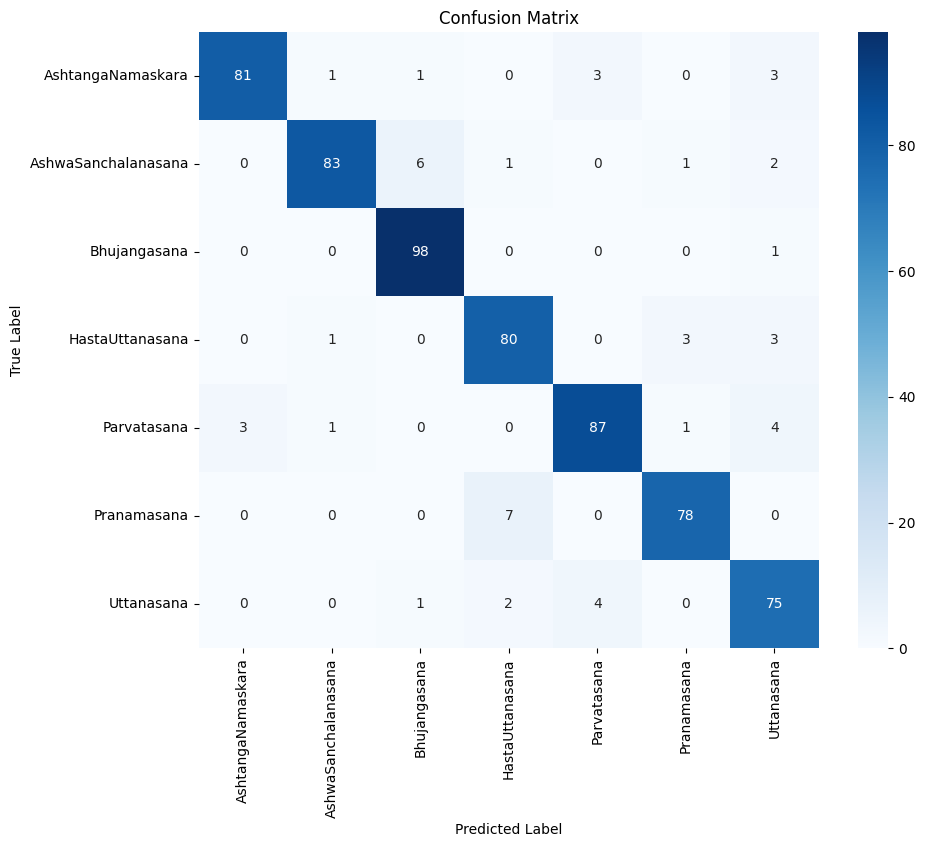

In [44]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

In [50]:
cr = classification_report(y_test, y_pred)
print('Classification report:\n', cr)

Classification report:
                      precision    recall  f1-score   support

  AshtangaNamaskara       0.96      0.91      0.94        89
AshwaSanchalanasana       0.97      0.89      0.93        93
       Bhujangasana       0.92      0.99      0.96        99
    HastaUttanasana       0.89      0.92      0.90        87
        Parvatasana       0.93      0.91      0.92        96
        Pranamasana       0.94      0.92      0.93        85
         Uttanasana       0.85      0.91      0.88        82

           accuracy                           0.92       631
          macro avg       0.92      0.92      0.92       631
       weighted avg       0.92      0.92      0.92       631



## Manual Evaluation

In [51]:
import cv2
import mediapipe as mp

In [53]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True)

I0000 00:00:1731485836.567518 1156941 gl_context.cc:357] GL version: 2.1 (2.1 ATI-6.1.13), renderer: AMD Radeon Pro 5300M OpenGL Engine


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1731485836.737476 1182652 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731485836.774036 1182664 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [54]:
test_img = cv2.imread('../data/sun_salutation_poses/test/Bhujangasana/16102003_2564.jpg', cv2.COLOR_BGR2RGB)

In [56]:
results = pose.process(test_img)

In [94]:
row = []
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark
    for landmark in landmarks:
        row.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])

In [ ]:
temp = np.expand_dims(row)

In [104]:
knnc.predict(temp)[0]

/Users/apple/Desktop/Internship/Week_5_6/Final_Project/myenv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'Bhujangasana'

# Xgboost Classifier

In [1]:
import xgboost as xgb

In [74]:
classifier = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=500, learning_rate=0.35)

In [75]:
y_train

0       HastaUttanasana
1       HastaUttanasana
2       HastaUttanasana
3       HastaUttanasana
4       HastaUttanasana
             ...       
2555        Pranamasana
2556        Pranamasana
2557        Pranamasana
2558        Pranamasana
2559        Pranamasana
Name: class, Length: 2560, dtype: object

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
lab_enc = LabelEncoder()

In [78]:
y_train_enc = lab_enc.fit_transform(y_train)
y_train_enc

array([3, 3, 3, ..., 5, 5, 5])

In [79]:
classifier.fit(X_train, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.35, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [80]:
y_pred_enc = classifier.predict(X_test)

In [81]:
y_pred = lab_enc.inverse_transform(y_pred_enc)

In [82]:
classifier.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [83]:
class_names = lab_enc.classes_
class_names

array(['AshtangaNamaskara', 'AshwaSanchalanasana', 'Bhujangasana',
       'HastaUttanasana', 'Parvatasana', 'Pranamasana', 'Uttanasana'],
      dtype=object)

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

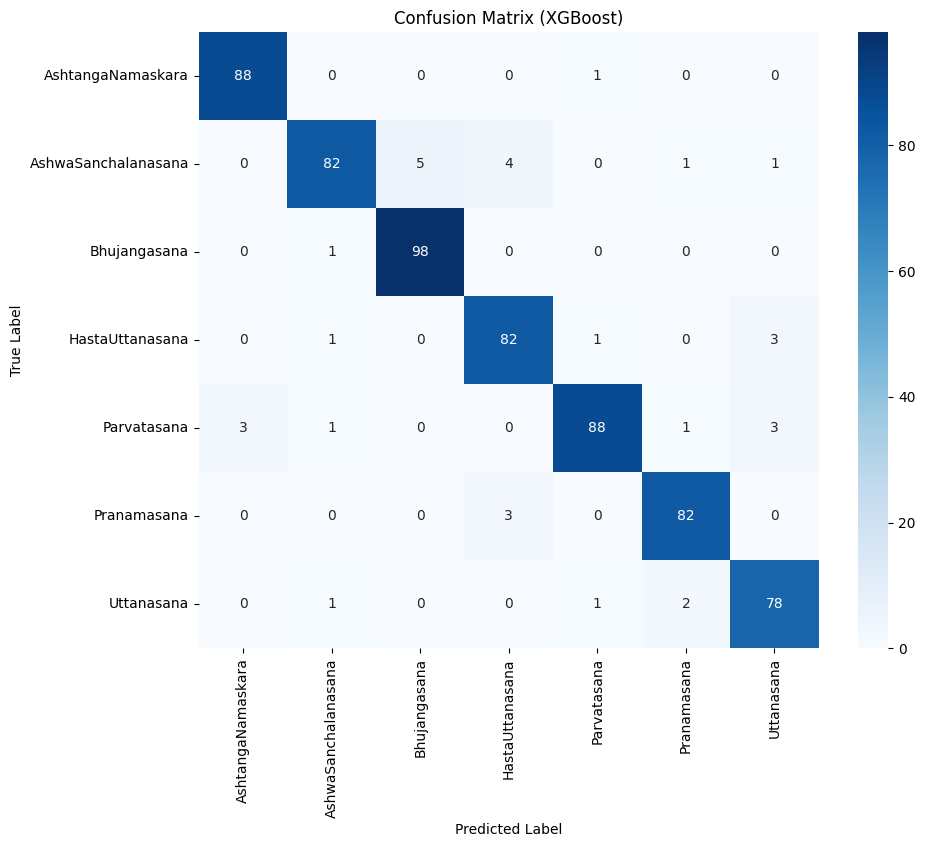

In [85]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (XGBoost)')
plt.show()